<a href="https://colab.research.google.com/github/aleaba93/PublicStuff/blob/MAIN2/Dices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importo librerie

In [1]:
# %load_ext autoreload
# %autoreload 2

# Import all libraries :
import math
import time
from time import time
import datetime
import numpy as np
import pandas as pd
import random
from random import randint
from pandas.tseries.offsets import MonthEnd
from IPython.display import clear_output
import sys
from pprint import pprint
#from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
# Silences filter type warnings
import warnings
warnings.filterwarnings('ignore')
# Change the max # of columns and rows
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option("display.max_rows", 350)
pd.set_option("display.max_columns", 200)

#PARAMS

In [3]:
AC = list(range(1, 22)) # Change the first param to modify the min Armor Class and the second for the max AC
PB = 2 # Proficiency bonus
ATT = 3 # Attribute modifier
MW = 0 # Magic weapon (it can be 0, 1, 2 or 3)
BLS = False # Set True if you want to add the effect of the spell "Bless", False otherwise
dices_number = 20

# FUNCTIONS

In [4]:
def blss():
    if BLS:
        return randint(1,4)
    else:
        return 0

# n: numero di dadi da lanciare, m: massimale del dado (di default è 6)
def dann(n, m=6):
    somma=[]
    for i in range(n):
        d6 =randint(1, m)
        somma.append(d6)
    return sum(somma)

def d20():
    return randint(1,20)

# GETTING THE DATA

In [5]:
# Roll 100 dices (both Great Weapon Master and Normal)
gwm=[] #list of dmgs
noG=[] #list of dmgs
df = pd.DataFrame(columns=["AC", "GWM", "noG"])

for ac in AC:
    for i in range(dices_number):
      #Rolls with Great Weapon Master
        tpc = d20() + PB + ATT -5 + blss() + MW
        if tpc >= ac:
            great = dann(2,6) +ATT +10 + MW
        else:
            great = 0 #Miss -> 0 damage
        gwm.append(great)
      #Rolls without Great Weapon Master
        tpc = d20() + PB + ATT + blss() + MW
        if tpc >= ac:
            norm = dann(2,6) +ATT + MW
        else:
            norm = 0 #Miss -> 0 damage
        noG.append(norm)

        new_row = pd.DataFrame({'AC': ac, 'GWM': great, 'noG': norm}, index=[0])
        df = pd.concat([df.loc[:], new_row]).reset_index(drop=True)
        #df = pd.concat([df, pd.DataFrame()], ignore_index=True) #df con singoli valori

df.shape

(420, 3)

Im thinking about making the mean of 5 rolls (~ a fight) and repeat 100 times. Like the result of 100 fights...

In [6]:
print(df.head(3).set_index(["AC"]),'\n', df.tail(3).set_index(["AC"]))

   GWM noG
AC        
1   23  10
1   22  11
1   21   7 
    GWM noG
AC        
21   0   0
21   0   0
21   0   0


In [7]:
#Create a dataframe with Hitting chance % and mean
HIT = pd.DataFrame()
for ac in AC:
    # hitchance by ac
    for k in [1,2]:
        exec(f'hit{k} = round( df[(df.AC==ac) & (df.iloc[:,{k}]!=0)][df.columns[{k}]].count() / len(df[df.AC==ac])*100 ,1)')
    #print("AC:",ac,"H1:",hit1," h2:",hit2)
    # mean dmg by ac
        exec(f'dmg{k} = round( df[df.AC==ac][df.columns[{k}]].sum() / len(df[df.AC==ac]) ,1)')
    #print("AC:",ac,"H1:",hit1," h2:",hit2)
    to_conc = pd.DataFrame({'AC': ac, 'hitG': hit1, 'hitN': hit2, 'mnG': dmg1, 'mnN': dmg2}, index=[0])
    #HIT = pd.concat([HIT, to_conc]).reset_index=True
    HIT = pd.concat([HIT, to_conc], axis=0).reset_index(drop=True)

print("hit -> % of hitting \n mn -> mean damage dealt(missing is 0)")
HIT

hit -> % of hitting 
 mn -> mean damage dealt(missing is 0)


,AC,hitG,hitN,mnG,mnN
0,1,100.00000,100.00000,21.10000,10.40000
1,2,100.00000,100.00000,19.60000,10.10000
2,3,90.00000,100.00000,18.20000,9.80000
3,4,90.00000,100.00000,17.60000,9.50000
4,5,80.00000,100.00000,16.40000,9.30000
5,6,70.00000,100.00000,14.60000,10.00000
6,7,60.00000,90.00000,11.60000,9.20000
7,8,80.00000,95.00000,15.60000,9.30000
8,9,85.00000,85.00000,16.60000,8.80000
9,10,40.00000,85.00000,8.00000,8.20000


In [ ]:
#Creating dictionary of damage amount (key) and the frequency of that damage (items)
k=[]
i=[]
fGWM={}
fNoG={}
freqN=GWM
FreqG=noG



for l in [1,2]:
    for n in range(0,26):
        count = round((l.count(n)/len(l))*100, 1)
        k.append(n)
        i.append(count)
        # print(k)
        # print(i)
        if n == 25:
            # print(k,i)
            if l==gwm:
                fGWM = dict(zip(k, i))
            else:
                fNoG = dict(zip(k, i))

In [39]:
(df[df['GWM']== 0]['GWM'].count()/tot_rolls)*100

49.047619047619044

In [45]:
k=[]
i=[]
max = df.GWM.max()
tot_rolls= len(df)

for damgs in range(max):
  count = round((df[df['GWM']== damgs]['GWM'].count()/tot_rolls)*100, 1)
  print(damgs, count)
  k.append(damgs)
  i.append(count)
  fGWM = dict(zip(k, i))


0 49.0
1 0.0
2 0.0
3 0.0
4 0.0
5 0.0
6 0.0
7 0.0
8 0.0
9 0.0
10 0.0
11 0.0
12 0.0
13 0.0
14 0.0
15 1.4
16 2.1
17 6.9
18 4.0
19 6.9
20 8.6
21 7.6
22 4.3
23 5.2
24 2.4


# PLOTS

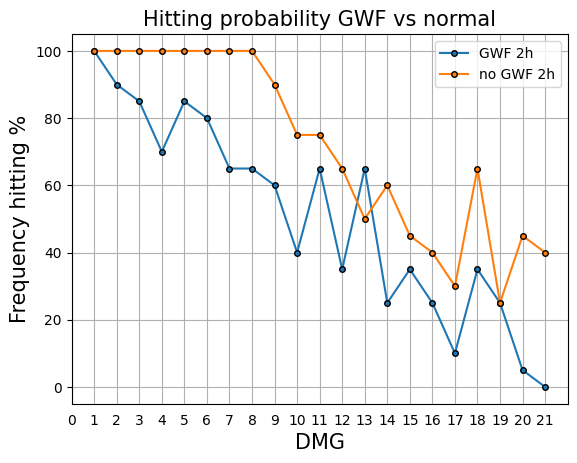

In [ ]:
# FREQUENCE hitting probability
x=list(HIT.AC)
y=list(HIT.hitG)
y2=list(HIT.hitN)

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x, y, marker='o', markersize=4, markeredgecolor='k', label='GWF 2h')  # Plot some data on the axes.
ax.plot(x, y2, marker='o', markersize=4, markeredgecolor='k', label='no GWF 2h')
ax.grid(True) #Adding grid
ax.legend()
plt.title('Hitting probability GWF vs normal',fontsize=15)
plt.xlabel('DMG',fontsize=15)
plt.ylabel('Frequency hitting %',fontsize=15)
# Genera una lista di valori sull'asse x e y
x_dispari = np.arange(0, 22, 1)
#y_dispari = np.arange(0, 27, 2)
# Imposta il range dell'asse x e y
plt.xticks(x_dispari)
#plt.yticks(y_dispari)
ax.tick_params(bottom=False)
plt.show()

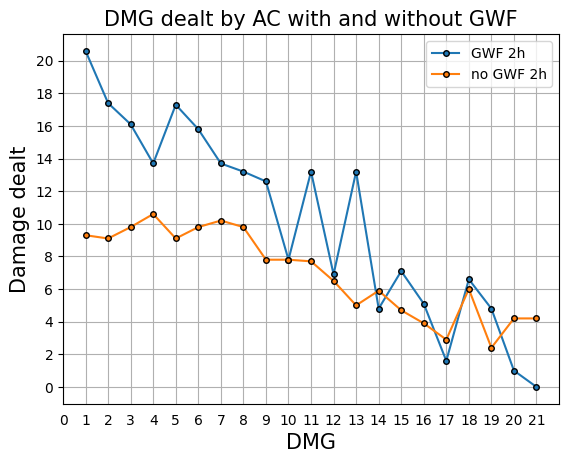

In [ ]:
# FREQUENCE valor damage
x=list(HIT.AC)
y=list(HIT.mnG)
y2=list(HIT.mnN)

fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(x, y, marker='o', markersize=4, markeredgecolor='k', label='GWF 2h')  # Plot some data on the axes.
ax.plot(x, y2, marker='o', markersize=4, markeredgecolor='k', label='no GWF 2h')
ax.grid(True) #Adding grid
ax.legend()
plt.title('DMG dealt by AC with and without GWF',fontsize=15)
plt.xlabel('DMG',fontsize=15)
plt.ylabel('Damage dealt',fontsize=15)
# Genera una lista di valori sull'asse x e y
x_dispari = np.arange(0, 22, 1)
y_dispari = np.arange(0, 22, 2)
# Imposta il range dell'asse x e y
plt.xticks(x_dispari)
plt.yticks(y_dispari)
ax.tick_params(bottom=False)
plt.show()

In [ ]:
#Distribution of damage


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
#fig = go.Figure()

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

fig.add_trace(go.Bar(x=HIT['AC'], y=HIT['mnG'], name='GWM dmg mean', marker_color='#FF6666'), secondary_y=False)
fig.add_trace(go.Bar(x=HIT['AC'], y=HIT['mnN'], name='base dmg mean', marker_color='#66b3ff'), secondary_y=False )
fig.add_trace(go.Line(x=HIT['AC'], y=HIT['hitG'], name='GWM % rate hit', line_color='#FF0000'), secondary_y=True)
fig.add_trace(go.Line(x=HIT['AC'], y=HIT['hitN'], name='base % rate hit', line_color='#6667ff'), secondary_y=True)
fig.update_layout(template='plotly', xaxis_title='x label', yaxis_title="y label", title="demo title")

# Add figure title
fig.update_layout(title_text="GWM vs base (with bless)", title_font_size = 21.5)

# Set x-axis title
fig.update_xaxes(title_text="AC levels", title_font_size = 17)

# Set y-axes titles
fig.update_yaxes(title_text="<b>Mean damage</b> (hist) - BLACK", title_font_size = 17,   secondary_y=False, gridwidth=1,   gridcolor='brown',  tickfont_size = 15, tickfont_color='brown')
fig.update_yaxes(title_text="<b>Hit chance %</b> (line) - VIOLET", title_font_size = 17, secondary_y=True,  gridwidth=1.5, gridcolor='violet', tickfont_size = 15, tickfont_color='violet')

# Set figure size
fig.layout.height = 700

fig.show()
#fig.write_html("demo1.html") #UNCOMMENT TO CREATE A HTML PLOT FILE